# <span style="color:crimson"> California House Pricing (Synthetic)</span>  <a class="anchor"  id="top"></a>

#  <span style="color:lightcoral"> 1. Introduction </span> <a class="anchor"  id="introduction"></a>

#### Predicting house prices

#  <span style="color:lightcoral"> 2. Importing Libraries </span> <a class="anchor"  id="import"></a>

In [25]:
%matplotlib inline

import pandas as pd
import numpy as np
import os

import matplotlib
import seaborn as sns
from matplotlib import pyplot as plt
#from pandas_profiling import ProfileReport

from sklearn.model_selection import KFold, cross_val_score, train_test_split, GridSearchCV
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.linear_model import ElasticNet
from sklearn.linear_model import BayesianRidge
from sklearn.linear_model import SGDRegressor
from sklearn.gaussian_process import GaussianProcessRegressor

from sklearn.neighbors import KNeighborsRegressor
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import PolynomialFeatures

from sklearn.metrics import mean_squared_error
from sklearn.svm import SVR
from sklearn.tree import DecisionTreeRegressor

from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.ensemble import AdaBoostRegressor
from sklearn.ensemble import BaggingRegressor

from sklearn.neural_network import MLPRegressor

import xgboost as xgb
#import lightgbm as lgb
import catboost as cb




import warnings
warnings.filterwarnings('ignore')


#  <span style="color:lightcoral"> 3. Loading and Checking Data </span> <a class="anchor"  id="load"></a>


In [26]:
train=pd.read_csv('../data/train.csv')
test=pd.read_csv('../data/test.csv')
sample_submission=pd.read_csv('../data/sample_submission.csv')

In [27]:
train.head()

,id,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,MedHouseVal
0,0,2.3859,15.0,3.827160,1.112100,1280.0,2.486989,34.60,-120.12,0.980
1,1,3.7188,17.0,6.013373,1.054217,1504.0,3.813084,38.69,-121.22,0.946
2,2,4.7750,27.0,6.535604,1.103175,1061.0,2.464602,34.71,-120.45,1.576
3,3,2.4138,16.0,3.350203,0.965432,1255.0,2.089286,32.66,-117.09,1.336
4,4,3.7500,52.0,4.284404,1.069246,1793.0,1.604790,37.80,-122.41,4.500


In [28]:
test.head()

,id,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude
0,37137,1.7062,35.0,4.966368,1.096539,1318.0,2.844411,39.75,-121.85
1,37138,1.3882,22.0,4.187035,1.098229,2296.0,3.180218,33.95,-118.29
2,37139,7.7197,21.0,7.129436,0.959276,1535.0,2.888889,33.61,-117.81
3,37140,4.6806,49.0,4.769697,1.048485,707.0,1.743590,34.17,-118.34
4,37141,3.1284,25.0,3.765306,1.081633,4716.0,2.003827,34.17,-118.29


In [29]:
train.describe().T

,count,mean,std,min,25%,50%,75%,max
id,37137.0,18568.000000,10720.672810,0.000000,9284.000000,18568.000000,27852.000000,37136.000000
MedInc,37137.0,3.851029,1.803167,0.499900,2.602300,3.515600,4.699700,15.000100
HouseAge,37137.0,26.057005,12.158221,2.000000,17.000000,25.000000,35.000000,52.000000
AveRooms,37137.0,5.163124,1.206242,0.851064,4.357522,5.068611,5.858597,28.837607
AveBedrms,37137.0,1.062204,0.096490,0.500000,1.020305,1.054545,1.088825,5.873181
Population,37137.0,1660.778919,1302.469608,3.000000,952.000000,1383.000000,1856.000000,35682.000000
AveOccup,37137.0,2.831243,2.702413,0.950000,2.394495,2.744828,3.125313,502.990610
Latitude,37137.0,35.570030,2.083179,32.550000,33.930000,34.190000,37.700000,41.950000
Longitude,37137.0,-119.554329,1.974028,-124.350000,-121.800000,-118.450000,-118.020000,-114.550000
MedHouseVal,37137.0,2.079751,1.158571,0.149990,1.208000,1.808000,2.660000,5.000010


In [30]:
test.describe().T

,count,mean,std,min,25%,50%,75%,max
id,24759.0,49516.000000,7147.451994,37137.000000,43326.500000,49516.000000,55705.500000,61895.000000
MedInc,24759.0,3.832618,1.797503,0.499900,2.590150,3.504600,4.687500,15.000100
HouseAge,24759.0,26.041561,12.177907,2.000000,17.000000,25.000000,35.000000,52.000000
AveRooms,24759.0,5.168789,1.252874,1.000000,4.356443,5.077143,5.858646,56.269231
AveBedrms,24759.0,1.063599,0.123630,0.560000,1.020460,1.054094,1.088295,10.500000
Population,24759.0,1679.327548,1365.598976,3.000000,955.000000,1398.000000,1874.000000,35682.000000
AveOccup,24759.0,2.830808,1.615320,0.764706,2.400000,2.751592,3.129167,230.172414
Latitude,24759.0,35.598007,2.097787,32.550000,33.930000,34.200000,37.720000,41.950000
Longitude,24759.0,-119.570208,1.977200,-124.230000,-121.800000,-118.460000,-118.020000,-114.550000


In [31]:
print("duplicates in train : " + str(train.duplicated().sum()))
print("duplicates in test : " + str(test.duplicated().sum()))

duplicates in train : 0
duplicates in test : 0


In [32]:
train.isna().sum()

id             0
MedInc         0
HouseAge       0
AveRooms       0
AveBedrms      0
Population     0
AveOccup       0
Latitude       0
Longitude      0
MedHouseVal    0
dtype: int64

In [33]:
test.isna().sum()

id            0
MedInc        0
HouseAge      0
AveRooms      0
AveBedrms     0
Population    0
AveOccup      0
Latitude      0
Longitude     0
dtype: int64

####  <span style="color:lightcoral"> Early Observations </span> <a class="anchor"  id="obs"></a>
- Training set has 37,137 observations. Test set has 24,759 observations
- No missing values
- No duplicates
- Train and test sets have similar distributions for all fields
- Mean and median values are close for all fields. This indicates symmetric distribution

#  <span style="color:lightcoral"> 4. Exploratory Data Analysis </span> <a class="anchor"  id="eda"></a>


In [34]:
def skew_cat(skew_val):
    if skew_val>0.5:
        return 'skewed towards the tail'
    elif skew_val<-.5:
        return 'skewed towards the head'
    else:
        return 'fairly symmetric'

def skew_chart(x,var):
    print("Distribution of " + str(var))
    sns.distplot(x)
    plt.show()
    print("The skew of "+str(var)+" is "+str(x.skew()) + " which indicates that it is " + skew_cat(x.skew()))

Distribution of MedInc


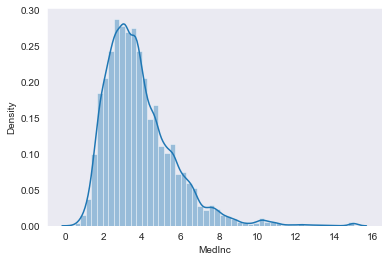

The skew of MedInc is 1.567603953234695 which indicates that it is skewed towards the tail
Distribution of HouseAge


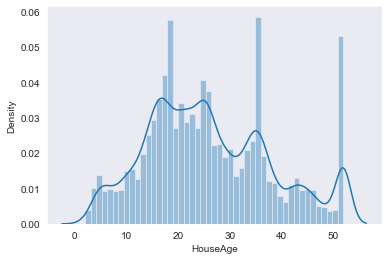

The skew of HouseAge is 0.41345665960443284 which indicates that it is fairly symmetric
Distribution of AveRooms


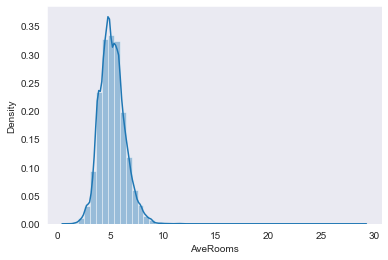

The skew of AveRooms is 1.3011062976822336 which indicates that it is skewed towards the tail
Distribution of AveBedrms


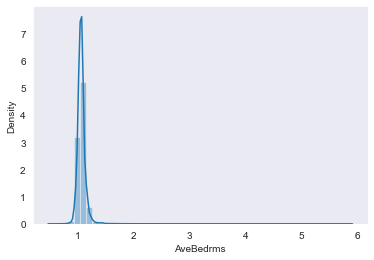

The skew of AveBedrms is 12.965448860673511 which indicates that it is skewed towards the tail
Distribution of Population


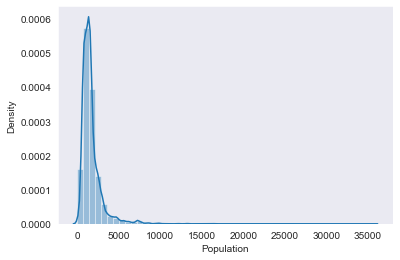

The skew of Population is 5.796581521430512 which indicates that it is skewed towards the tail
Distribution of AveOccup


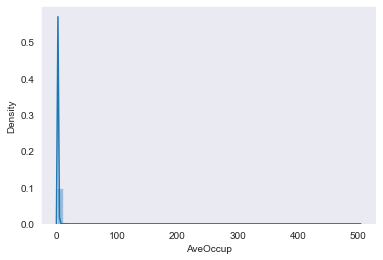

The skew of AveOccup is 170.89012952681514 which indicates that it is skewed towards the tail
Distribution of Latitude


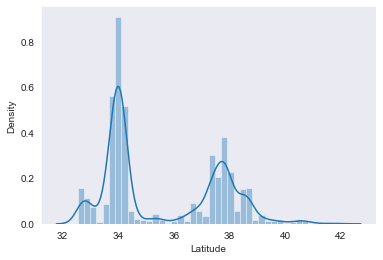

The skew of Latitude is 0.43925094303507367 which indicates that it is fairly symmetric
Distribution of Longitude


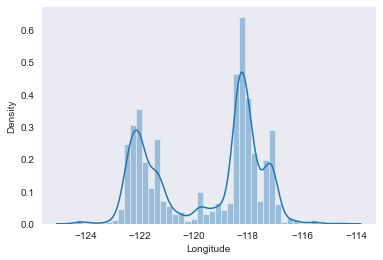

The skew of Longitude is -0.3132422287778205 which indicates that it is fairly symmetric
Distribution of MedHouseVal


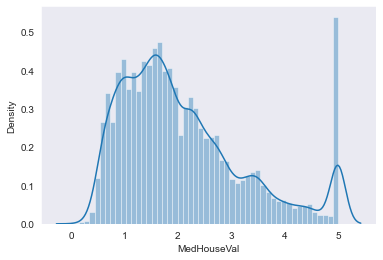

The skew of MedHouseVal is 0.9708561212732252 which indicates that it is skewed towards the tail


[None, None, None, None, None, None, None, None, None]

In [35]:
[skew_chart(train[i],i) for i in train.columns.tolist() if 'id' not in i]

In [36]:
def outlier(dat,x,val):
      print("Box Plot for " + str(val))
      sns.set_style("dark")
      sns.boxplot(x)
      plt.show()
      print("As per the 'Median +/- 1.5 times IQR")
      med=x.median()
      upq=np.percentile(x,75)
      lwq=np.percentile(x,25)
      iqr=upq-lwq
      print (med,upq,lwq,iqr)

      print("For "+str(val)+" there are " + str(len(dat[x<(med-1.5*(iqr))])) + " outliers on the lower side")
      print("For "+str(val)+" there are " + str(len(dat[x>(med+1.5*(iqr))])) + " outliers on the upper side")
      print('----------')

Box Plot for MedInc


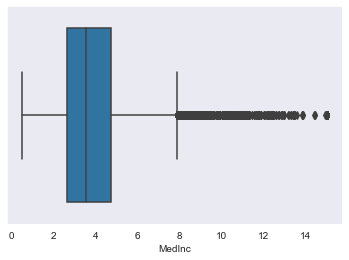

As per the 'Median +/- 1.5 times IQR
3.5156 4.6997 2.6023 2.0974
For MedInc there are 0 outliers on the lower side
For MedInc there are 2472 outliers on the upper side
----------
Box Plot for HouseAge


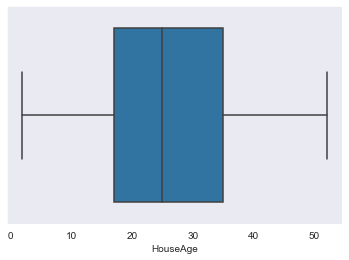

As per the 'Median +/- 1.5 times IQR
25.0 35.0 17.0 18.0
For HouseAge there are 0 outliers on the lower side
For HouseAge there are 0 outliers on the upper side
----------
Box Plot for AveRooms


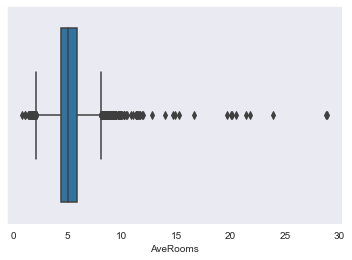

As per the 'Median +/- 1.5 times IQR
5.068610634648371 5.858597285067873 4.357522123893805 1.501075161174068
For AveRooms there are 555 outliers on the lower side
For AveRooms there are 1585 outliers on the upper side
----------
Box Plot for AveBedrms


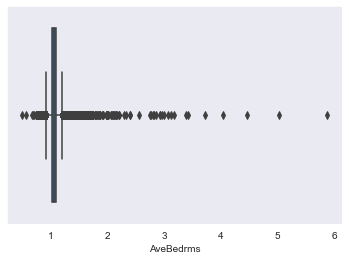

As per the 'Median +/- 1.5 times IQR
1.0545454545454545 1.0888252148997135 1.0203045685279188 0.06852064637179467
For AveBedrms there are 1163 outliers on the lower side
For AveBedrms there are 2424 outliers on the upper side
----------
Box Plot for Population


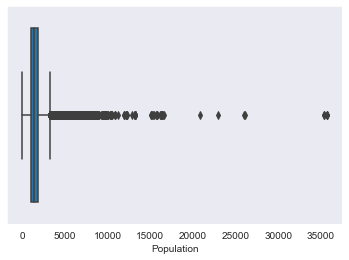

As per the 'Median +/- 1.5 times IQR
1383.0 1856.0 952.0 904.0
For Population there are 28 outliers on the lower side
For Population there are 4003 outliers on the upper side
----------
Box Plot for AveOccup


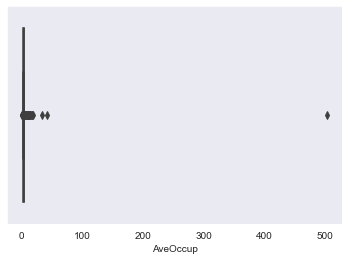

As per the 'Median +/- 1.5 times IQR
2.7448275862068967 3.12531328320802 2.3944954128440368 0.7308178703639832
For AveOccup there are 651 outliers on the lower side
For AveOccup there are 2710 outliers on the upper side
----------
Box Plot for Latitude


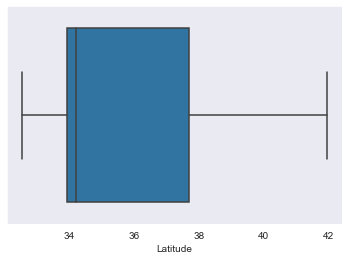

As per the 'Median +/- 1.5 times IQR
34.19 37.7 33.93 3.770000000000003
For Latitude there are 0 outliers on the lower side
For Latitude there are 483 outliers on the upper side
----------
Box Plot for Longitude


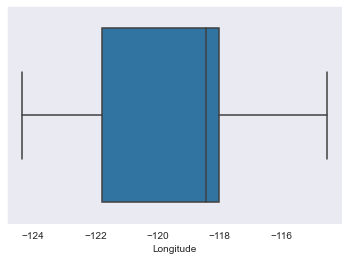

As per the 'Median +/- 1.5 times IQR
-118.45 -118.02 -121.8 3.780000000000001
For Longitude there are 88 outliers on the lower side
For Longitude there are 0 outliers on the upper side
----------
Box Plot for MedHouseVal


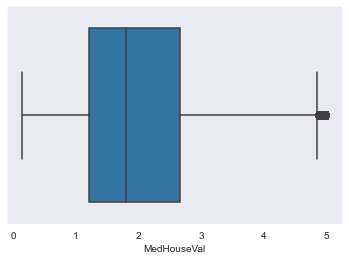

As per the 'Median +/- 1.5 times IQR
1.808 2.66 1.208 1.4520000000000002
For MedHouseVal there are 0 outliers on the lower side
For MedHouseVal there are 3266 outliers on the upper side
----------


[None, None, None, None, None, None, None, None, None]

In [37]:
[outlier(train,train[i],i) for i in train.columns.tolist() if 'id' not in i]

####  <span style="color:lightcoral"> Univariate Observations </span> <a class="uni"  id="model"></a>

- The target variable "MedHouseVal" seems to be capped at around 5
- There are long tails present for 'MedInc', 'AveRooms', 'AveBedrms', 'Population' & 'AveOccup'
- Latitude and Longitude have two distinct groups
- House age also seems to be capped at 50 and has concentrations at arounnd 15 and 35 years
- As shown in the distribution plots, the box diagrams confirm the present of outliers


#  <span style="color:lightcoral"> 5. Feature Engineering </span> <a class="anchor"  id="model"></a>


Log transformations

In [38]:
n_train=train

n_train['MedInc_log']=np.log(n_train.MedInc)
n_train['AveRooms_log']=np.log(n_train.AveRooms)
n_train['AveBedrms_log']=np.log(n_train.AveBedrms)
n_train['Population_log']=np.log(n_train.Population)
n_train['AveOccup_log']=np.log(n_train.AveOccup)


Distribution of MedInc_log


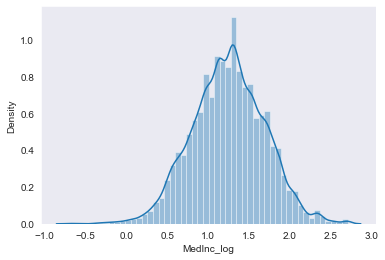

The skew of MedInc_log is -0.0259073751395148 which indicates that it is fairly symmetric
Distribution of AveRooms_log


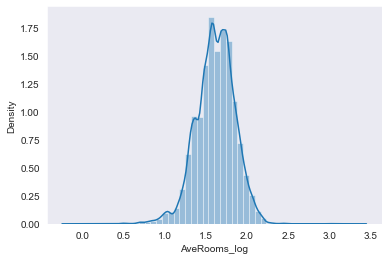

The skew of AveRooms_log is -0.3258478409535327 which indicates that it is fairly symmetric
Distribution of AveBedrms_log


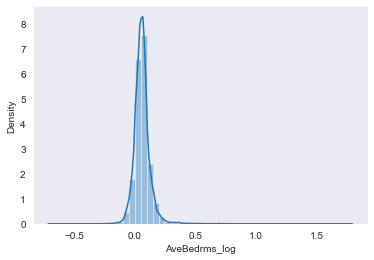

The skew of AveBedrms_log is 3.848335189141899 which indicates that it is skewed towards the tail
Distribution of Population_log


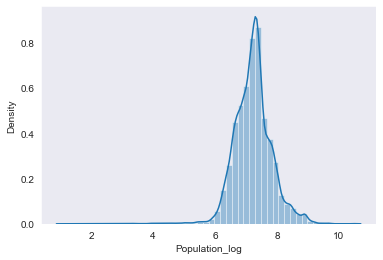

The skew of Population_log is -0.4507774468587389 which indicates that it is fairly symmetric
Distribution of AveOccup_log


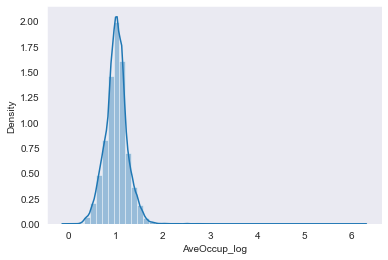

The skew of AveOccup_log is 0.5477617500189692 which indicates that it is skewed towards the tail


[None, None, None, None, None]

In [39]:
[skew_chart(n_train[i],i) for i in ['MedInc_log','AveRooms_log','AveBedrms_log','Population_log','AveOccup_log']]

Outlier treatment

In [40]:
def remove_outlier(x):
    med=x.median()
    upq=np.percentile(x,75)
    lwq=np.percentile(x,25)
    iqr=upq-lwq
    x=np.where(x>med+1.5*iqr,med+1.5*iqr,np.where(x<med-1.5*iqr,med-1.5*iqr,x))
    val=[med,iqr]
    return x,val

In [41]:
val_dict={}
for i in n_train.columns:
    n_train[i],val=remove_outlier(n_train[i])
    val_dict[i]=val
    

Box Plot for MedInc


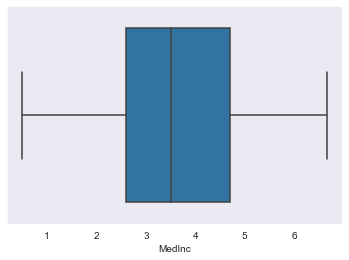

As per the 'Median +/- 1.5 times IQR
3.5156 4.6997 2.6023 2.0974
For MedInc there are 0 outliers on the lower side
For MedInc there are 0 outliers on the upper side
----------
Box Plot for HouseAge


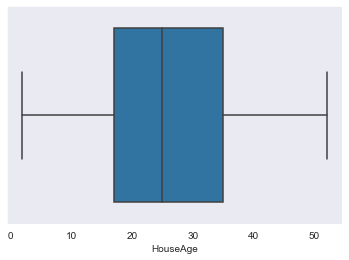

As per the 'Median +/- 1.5 times IQR
25.0 35.0 17.0 18.0
For HouseAge there are 0 outliers on the lower side
For HouseAge there are 0 outliers on the upper side
----------
Box Plot for AveRooms


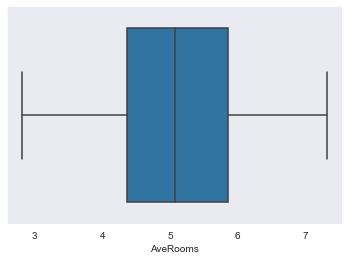

As per the 'Median +/- 1.5 times IQR
5.068610634648371 5.858597285067873 4.357522123893805 1.501075161174068
For AveRooms there are 0 outliers on the lower side
For AveRooms there are 0 outliers on the upper side
----------
Box Plot for AveBedrms


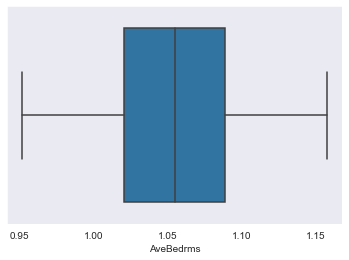

As per the 'Median +/- 1.5 times IQR
1.0545454545454545 1.0888252148997135 1.0203045685279188 0.06852064637179467
For AveBedrms there are 0 outliers on the lower side
For AveBedrms there are 0 outliers on the upper side
----------
Box Plot for Population


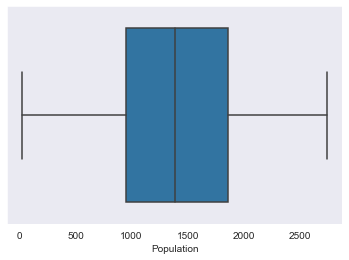

As per the 'Median +/- 1.5 times IQR
1383.0 1856.0 952.0 904.0
For Population there are 0 outliers on the lower side
For Population there are 0 outliers on the upper side
----------
Box Plot for AveOccup


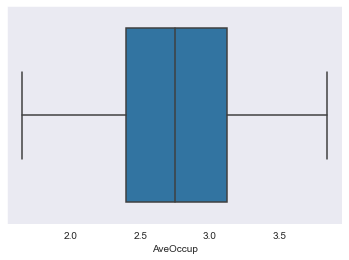

As per the 'Median +/- 1.5 times IQR
2.7448275862068967 3.12531328320802 2.3944954128440368 0.7308178703639832
For AveOccup there are 0 outliers on the lower side
For AveOccup there are 0 outliers on the upper side
----------
Box Plot for Latitude


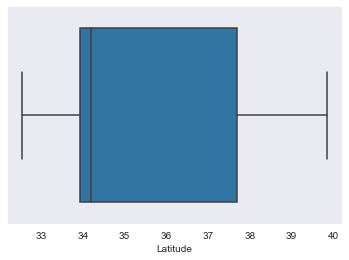

As per the 'Median +/- 1.5 times IQR
34.19 37.7 33.93 3.770000000000003
For Latitude there are 0 outliers on the lower side
For Latitude there are 0 outliers on the upper side
----------
Box Plot for Longitude


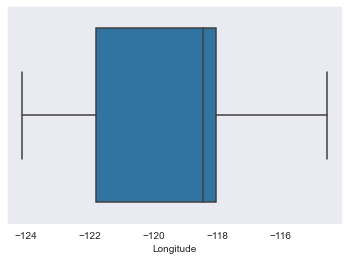

As per the 'Median +/- 1.5 times IQR
-118.45 -118.02 -121.8 3.780000000000001
For Longitude there are 0 outliers on the lower side
For Longitude there are 0 outliers on the upper side
----------
Box Plot for MedHouseVal


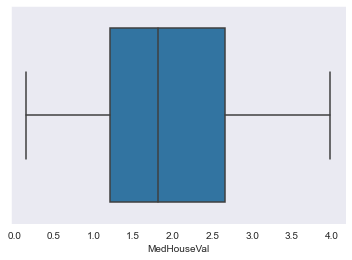

As per the 'Median +/- 1.5 times IQR
1.808 2.66 1.208 1.4520000000000002
For MedHouseVal there are 0 outliers on the lower side
For MedHouseVal there are 0 outliers on the upper side
----------
Box Plot for MedInc_log


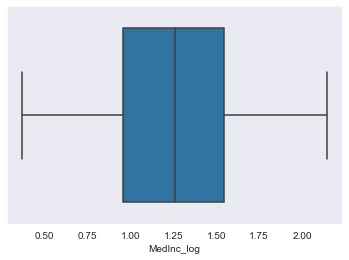

As per the 'Median +/- 1.5 times IQR
1.2572102077083531 1.5474986768915713 0.9563956693704597 0.5911030075211116
For MedInc_log there are 0 outliers on the lower side
For MedInc_log there are 0 outliers on the upper side
----------
Box Plot for AveRooms_log


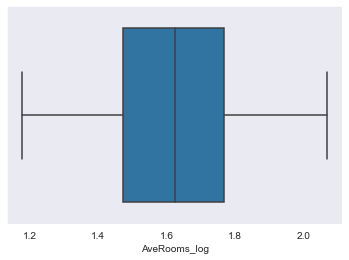

As per the 'Median +/- 1.5 times IQR
1.6230667434897064 1.767910203786248 1.4719035755979577 0.29600662818829027
For AveRooms_log there are 0 outliers on the lower side
For AveRooms_log there are 0 outliers on the upper side
----------
Box Plot for AveBedrms_log


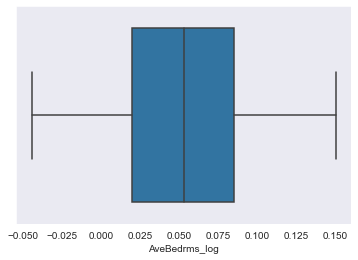

As per the 'Median +/- 1.5 times IQR
0.05310982531394833 0.08509933051800433 0.020101179321087303 0.06499815119691703
For AveBedrms_log there are 0 outliers on the lower side
For AveBedrms_log there are 0 outliers on the upper side
----------
Box Plot for Population_log


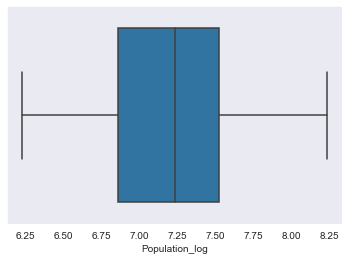

As per the 'Median +/- 1.5 times IQR
7.232010331664759 7.526178913346146 6.858565034791365 0.6676138785547812
For Population_log there are 0 outliers on the lower side
For Population_log there are 0 outliers on the upper side
----------
Box Plot for AveOccup_log


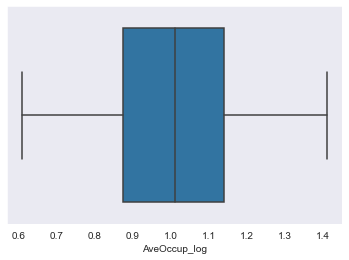

As per the 'Median +/- 1.5 times IQR
1.0097182628638635 1.139534528790173 0.8731725250935497 0.26636200369662333
For AveOccup_log there are 0 outliers on the lower side
For AveOccup_log there are 0 outliers on the upper side
----------


[None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None]

In [42]:
[outlier(n_train,n_train[i],i) for i in n_train.columns.tolist() if 'id' not in i]


In [43]:
def rt_crds(df): 
    
    df['rot_15_x'] = (np.cos(np.radians(15)) * df['Longitude']) + \
                      (np.sin(np.radians(15)) * df['Latitude'])
    
    df['rot_15_y'] = (np.cos(np.radians(15)) * df['Latitude']) - \
                      (np.sin(np.radians(15)) * df['Longitude'])
    
    df['rot_30_x'] = (np.cos(np.radians(30)) * df['Longitude']) + \
                      (np.sin(np.radians(30)) * df['Latitude'])
    
    df['rot_30_y'] = (np.cos(np.radians(30)) * df['Latitude']) - \
                      (np.sin(np.radians(30)) * df['Longitude'])
    
    df['rot_45_x'] = (np.cos(np.radians(45)) * df['Longitude']) + \
                      (np.sin(np.radians(45)) * df['Latitude'])
    
    df['rot_45_y'] = (np.cos(np.radians(45)) * df['Latitude']) - \
                      (np.sin(np.radians(45)) * df['Longitude'])

    return df


In [44]:
n_train_2=rt_crds(n_train)

#  <span style="color:lightcoral"> 6. Model Training </span> <a class="anchor"  id="model"></a>


In [45]:
X_vars = [i for i in n_train_2.columns.to_list() if i not in (['id','MedHouseVal'])]
print(X_vars)
X=n_train_2[X_vars]
y=n_train_2['MedHouseVal']

['MedInc', 'HouseAge', 'AveRooms', 'AveBedrms', 'Population', 'AveOccup', 'Latitude', 'Longitude', 'MedInc_log', 'AveRooms_log', 'AveBedrms_log', 'Population_log', 'AveOccup_log', 'rot_15_x', 'rot_15_y', 'rot_30_x', 'rot_30_y', 'rot_45_x', 'rot_45_y']


In [46]:
X_train, X_val, y_train, y_val=train_test_split(X, y, test_size=.3, random_state=42)

In [47]:
scaler=StandardScaler()
scaler.fit(X_train)

StandardScaler()

In [48]:
X_train_scaled=scaler.transform(X_train)
X_val_scaled=scaler.transform(X_val)

In [49]:
model_list=[LinearRegression(),SVR(),DecisionTreeRegressor(),RandomForestRegressor(),GradientBoostingRegressor(),MLPRegressor(),Ridge(),Lasso(),ElasticNet(),KNeighborsRegressor(),BayesianRidge(),SGDRegressor()]

In [50]:
def model_trials(model_name,X_train,y_train,X_val,y_val):
    model=model_name
    model.fit(X_train,y_train)
    y_train_pred=model.predict(X_train)
    y_val_pred=model.predict(X_val)
    rmse_train=np.sqrt(mean_squared_error(y_train, y_train_pred))
    rmse_val=np.sqrt(mean_squared_error(y_val, y_val_pred))
    
    print(model_name)
    print("RMSE-train : " + str(rmse_train))
    print("RMSE-val : " + str(rmse_val))
    print('\n')

In [51]:
model_trials(LinearRegression(),X_train_scaled,y_train,X_val_scaled,y_val)

LinearRegression()
RMSE-train : 0.5929822532678368
RMSE-val : 0.6056064436007631




In [52]:
for model in model_list:
    model_trials(model,X_train,y_train,X_val,y_val)


LinearRegression()
RMSE-train : 0.5930544716882855
RMSE-val : 0.605592839628025


SVR()
RMSE-train : 1.0021658347106481
RMSE-val : 1.0094682934378993


DecisionTreeRegressor()
RMSE-train : 3.230277409621945e-16
RMSE-val : 0.7122991600908927


RandomForestRegressor()
RMSE-train : 0.18703248639924444
RMSE-val : 0.5108311846008707


GradientBoostingRegressor()
RMSE-train : 0.49131987663271104
RMSE-val : 0.514087645559672


MLPRegressor()
RMSE-train : 0.8047132682555626
RMSE-val : 0.8127504878916105


Ridge()
RMSE-train : 0.5932751751417346
RMSE-val : 0.6055279466464024


Lasso()
RMSE-train : 0.9889626049727368
RMSE-val : 0.9925795078101316


ElasticNet()
RMSE-train : 0.8174574901854471
RMSE-val : 0.8252723324647053


KNeighborsRegressor()
RMSE-train : 0.6940785556549839
RMSE-val : 0.8687654983931921


BayesianRidge()
RMSE-train : 0.593231408361495
RMSE-val : 0.6055823330147595


SGDRegressor()
RMSE-train : 82115715552578.45
RMSE-val : 82706814055952.69




#  <span style="color:lightcoral"> 7. Fine Tuning </span> <a class="anchor"  id="ft"></a>


In [53]:
selected_model=[LinearRegression(),RandomForestRegressor(),GradientBoostingRegressor(),MLPRegressor(),Ridge()]

In [54]:
param_grids = [{},  # LinearRegression
               {'n_estimators': [10, 50, 100, 200], 'max_depth': [None, 5, 10, 20]},  # RandomForestRegressor
               {'n_estimators': [10, 50, 100, 200], 'max_depth': [None, 5, 10, 20]},  # GradientBoostingRegressor
               {'hidden_layer_sizes': [(10,), (50,), (100,)], 'alpha': [0.0001, 0.001, 0.01]},  # MLPRegressor
               {'alpha': [0.1, 1.0, 10.0]}]  # Ridge

In [55]:
best_models = []
for model, param_grid in zip(selected_model, param_grids):
    # Create the grid search object
    grid_search = GridSearchCV(model, param_grid, cv=5, scoring='neg_mean_squared_error')

    # Fit the grid search object to the training data
    grid_search.fit(X_train_scaled, y_train)
    
    # Make predictions on the test data
    y_pred = grid_search.predict(X_val_scaled)
    
    # Calculate the mean squared error on the test data
    mse = mean_squared_error(y_val, y_pred)

    
    # Get the best model and its score
    best_model = grid_search.best_estimator_
    best_score = grid_search.best_score_

    # Append the best model and its score to the list
    best_models.append((best_model, best_score, mse))

    # Sort the models by their scores
    best_models.sort(key=lambda x: x[1], reverse=True)

    # Print the best model and its score
    print(f'Best model: {best_models[0][0]}')
    print(f'Best score: {best_models[0][1]:.3f}')
    print(f'Best mse: {best_models[0][2]:.3f}')


Best model: LinearRegression()
Best score: -0.352
Best mse: 0.367


In [104]:
model=GradientBoostingRegressor(max_depth=3, n_estimators=50)
model.fit(X_train_scaled,y_train)
y_train_pred=model.predict(X_train_scaled)
y_val_pred=model.predict(X_val_scaled)
rmse_train=np.sqrt(mean_squared_error(y_train, y_train_pred))
rmse_val=np.sqrt(mean_squared_error(y_val, y_val_pred))
print(model)
print("RMSE-train : " + str(rmse_train))
print("RMSE-val : " + str(rmse_val))
print('\n')


GradientBoostingRegressor(n_estimators=50)
RMSE-train : 0.5132904793343266
RMSE-val : 0.5305807255205588




#  <span style="color:lightcoral"> 8. Lgbm & XGBoost </span> <a class="anchor"  id="lgbm"></a>

In [105]:
model = xgb.XGBRegressor(n_estimators=50, max_depth=4)
model.fit(X_train_scaled,y_train)
y_train_pred=model.predict(X_train_scaled)
y_val_pred=model.predict(X_val_scaled)
rmse_train=np.sqrt(mean_squared_error(y_train, y_train_pred))
rmse_val=np.sqrt(mean_squared_error(y_val, y_val_pred))
print(model)
print("RMSE-train : " + str(rmse_train))
print("RMSE-val : " + str(rmse_val))
print('\n')

XGBRegressor(base_score=0.5, booster='gbtree', callbacks=None,
             colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
             early_stopping_rounds=None, enable_categorical=False,
             eval_metric=None, gamma=0, gpu_id=-1, grow_policy='depthwise',
             importance_type=None, interaction_constraints='',
             learning_rate=0.300000012, max_bin=256, max_cat_to_onehot=4,
             max_delta_step=0, max_depth=4, max_leaves=0, min_child_weight=1,
             missing=nan, monotone_constraints='()', n_estimators=50, n_jobs=0,
             num_parallel_tree=1, predictor='auto', random_state=0, reg_alpha=0,
             reg_lambda=1, ...)
RMSE-train : 0.4697885866535253
RMSE-val : 0.5089427454363976




In [106]:
model = lgb.LGBMRegressor(n_estimators=250, max_depth=3)
model.fit(X_train_scaled,y_train)
y_train_pred=model.predict(X_train_scaled)
y_val_pred=model.predict(X_val_scaled)
rmse_train=np.sqrt(mean_squared_error(y_train, y_train_pred))
rmse_val=np.sqrt(mean_squared_error(y_val, y_val_pred))
print(model)
print("RMSE-train : " + str(rmse_train))
print("RMSE-val : " + str(rmse_val))
print('\n')

LGBMRegressor(max_depth=3, n_estimators=250)
RMSE-train : 0.47320042780440025
RMSE-val : 0.5008195074273069




In [120]:
model = cb.CatBoostRegressor(iterations=100, depth=5)
model.fit(X_train_scaled,y_train)
y_train_pred=model.predict(X_train_scaled)
y_val_pred=model.predict(X_val_scaled)
rmse_train=np.sqrt(mean_squared_error(y_train, y_train_pred))
rmse_val=np.sqrt(mean_squared_error(y_val, y_val_pred))
print(model)
print("RMSE-train : " + str(rmse_train))
print("RMSE-val : " + str(rmse_val))
print('\n')

Learning rate set to 0.445381
0:	learn: 0.7653174	total: 60.9ms	remaining: 6.03s
1:	learn: 0.6584585	total: 65.9ms	remaining: 3.23s
2:	learn: 0.5993571	total: 71.1ms	remaining: 2.3s
3:	learn: 0.5700759	total: 75.6ms	remaining: 1.81s
4:	learn: 0.5527324	total: 79.5ms	remaining: 1.51s
5:	learn: 0.5369855	total: 84ms	remaining: 1.32s
6:	learn: 0.5321144	total: 87.9ms	remaining: 1.17s
7:	learn: 0.5278673	total: 92ms	remaining: 1.06s
8:	learn: 0.5247530	total: 96ms	remaining: 971ms
9:	learn: 0.5212720	total: 100ms	remaining: 903ms
10:	learn: 0.5185390	total: 104ms	remaining: 845ms
11:	learn: 0.5161788	total: 109ms	remaining: 797ms
12:	learn: 0.5155194	total: 113ms	remaining: 754ms
13:	learn: 0.5143010	total: 117ms	remaining: 716ms
14:	learn: 0.5124244	total: 121ms	remaining: 684ms
15:	learn: 0.5110238	total: 125ms	remaining: 656ms
16:	learn: 0.5097267	total: 130ms	remaining: 634ms
17:	learn: 0.5084925	total: 135ms	remaining: 613ms
18:	learn: 0.5068749	total: 139ms	remaining: 593ms
19:	learn

In [123]:
param_grids = [{'n_estimators': [50, 100, 200],
                  'max_depth': [3, 5, 7],
                  'learning_rate': [0.1, 0.01, 0.001],
                  'reg_lambda': [0.01, 0.1, 1.0],
                  'gamma': [0.1, 1.0, 10.0]},
                 {'n_estimators': [50, 100, 200],
                  'max_depth': [3, 5, 7],
                  'learning_rate': [0.1, 0.01, 0.001],
                  'reg_lambda': [0.01, 0.1, 1.0],
                  'min_split_gain': [0.1, 1.0, 10.0]},
               {'iterations': [50, 100, 200],
              'depth': [3, 5, 7],
              'learning_rate': [0.1, 0.01, 0.001],
              'l2_leaf_reg': [0.01, 0.1, 1.0],
              'border_count': [8, 16, 32],
              'bagging_temperature': [0.5, 1.0, 2.0]}]
               
    
selected_model=[xgb.XGBRegressor(),lgb.LGBMRegressor(),cb.CatBoostRegressor()]
               

In [ ]:

best_models = []
for model, param_grid in zip(selected_model, param_grids):
    # Create the grid search object
    grid_search = GridSearchCV(model, param_grid, cv=5, scoring='neg_mean_squared_error')

    # Fit the grid search object to the training data
    grid_search.fit(X_train_scaled, y_train)
    
    # Make predictions on the test data
    y_pred = grid_search.predict(X_val_scaled)
    
    # Calculate the mean squared error on the test data
    mse = mean_squared_error(y_val, y_pred)

    
    # Get the best model and its score
    best_model = grid_search.best_estimator_
    best_score = grid_search.best_score_

    # Append the best model and its score to the list
    best_models.append((best_model, best_score, mse))

    # Sort the models by their scores
    best_models.sort(key=lambda x: x[2], reverse=True)

    # Print the best model and its score
    print(f'Best model: {best_models[0][0]}')
    print(f'Best score: {best_models[0][1]:.3f}')
    print(f'Best mse: {best_models[0][2]:.3f}')


In [ ]:
model = lgb.LGBMRegressor(n_estimators=200, max_depth=3)
model.fit(X_train_scaled,y_train)
y_train_pred=model.predict(X_train_scaled)
y_val_pred=model.predict(X_val_scaled)
rmse_train=np.sqrt(mean_squared_error(y_train, y_train_pred))
rmse_val=np.sqrt(mean_squared_error(y_val, y_val_pred))
print(model)
print("RMSE-train : " + str(rmse_train))
print("RMSE-val : " + str(rmse_val))
print('\n')

#  <span style="color:lightcoral"> 9. Prediction </span> <a class="anchor"  id="pred"></a>


In [117]:
test['MedInc_log']=np.log(test.MedInc)
test['AveRooms_log']=np.log(test.AveRooms)
test['AveBedrms_log']=np.log(test.AveBedrms)
test['Population_log']=np.log(test.Population)
test['AveOccup_log']=np.log(test.AveOccup)

n_test=rt_crds(test)

for i in [a for a in X_vars if a not in ['rot_15_x', 'rot_15_y', 'rot_30_x', 'rot_30_y', 'rot_45_x', 'rot_45_y']]:
    n_test[i]=np.where(n_test[i]>val_dict[i][0]+1.5*val_dict[i][1],val_dict[i][0]+1.5*val_dict[i][1],np.where(n_test[i]<val_dict[i][0]-1.5*val_dict[i][1],val_dict[i][0]-1.5*val_dict[i][1],n_test[i]))


X_test=n_test[X_vars]
X_test_scaled=scaler.transform(X_test)
y_test_predict=model.predict(X_test_scaled)
test['MedHouseVal']=y_test_predict

In [118]:
sample_submission=test[['id','MedHouseVal']]
sample_submission['MedHouseVal']=np.where(sample_submission['MedHouseVal']>5,5,sample_submission['MedHouseVal'])
sample_submission.to_csv('submission.csv', index=False)